# Loan approval prediction


### 1.import important library's and load data set

In [1]:
#import important library's
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#to load LOAN dataset 
df=pd.read_csv('loan.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
#total rows and column
df.shape

(614, 13)

### check the missing values

In [4]:
#to check total null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

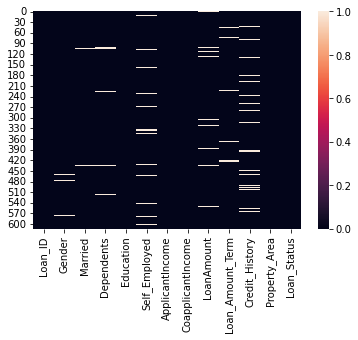

In [5]:
#visualizing null values
sns.heatmap(df.isnull())

### missing values in percent

In [6]:
#checking missing value in percent

df.isnull().sum()*100/df.shape[0]

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

### handling null values 

In [7]:
#here the Gender column has male=489 and female=112
#so we are filling missing values with male
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
#filling gendercolumn null values 
df["Gender"].fillna("Male", inplace = True)

In [9]:
#filling null values in  Married column
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [10]:
df["Married"].fillna("Yes", inplace = True)

In [11]:
#filling missing values in dependents column
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [12]:
df['Dependents'].fillna('0', inplace=True)

In [13]:
#filling missing values in self_employed column
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [14]:
df['Self_Employed'].fillna('No', inplace=True)

In [15]:
#filling missing values in loanamount column
#to fill null values with mean of loan amount in loanamount  column
#first find mean of loan amount
m=df['LoanAmount'].mean()
print(m)
#to fill null values with mean of age
df['LoanAmount'].fillna(m,inplace=True) #inplace=True permanet fill with mean
#fillna is python fill null values keyword
df.isnull().sum() #to check null vales

146.41216216216216


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
#loan amount term
#here the column loanamountterm has numeric values but it has the group class of amounts
#so we are filling with higher group count which is 360.0
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [17]:
df['Loan_Amount_Term'].fillna('360.0',inplace=True)

In [18]:
#filling null values in credit history
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [19]:
df['Credit_History'].fillna('1.0',inplace=True)

In [20]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

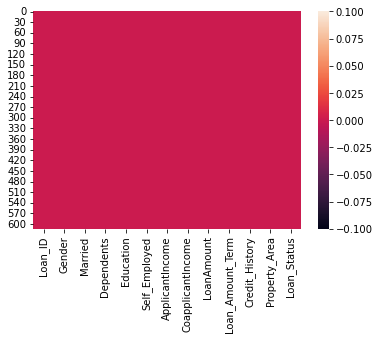

In [21]:
#now visualize null value
sns.heatmap(df.isnull())

In [22]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [23]:
df.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [24]:
#drop the Loan_ID column
df.drop('Loan_ID',axis=1,inplace=True)

In [25]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [26]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

### there are some columns datatypes which needs to be converted

In [27]:

df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
360.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [28]:
df['Loan_Amount_Term'].unique()

array([360.0, 120.0, 240.0, '360.0', 180.0, 60.0, 300.0, 480.0, 36.0,
       84.0, 12.0], dtype=object)

In [29]:
#converting loanamountterm datatype object to float
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype('float64')

In [30]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [31]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
1.0     50
Name: Credit_History, dtype: int64

In [32]:
df['Credit_History'].unique()

array([1.0, 0.0, '1.0'], dtype=object)

In [33]:
#converting loanamountterm datatype object to float
df['Credit_History']=df['Credit_History'].astype('float64')

In [34]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# visualizing some input columns for helpful need

Number of people who have applied for a loan group by a gender :
Male      502
Female    112
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

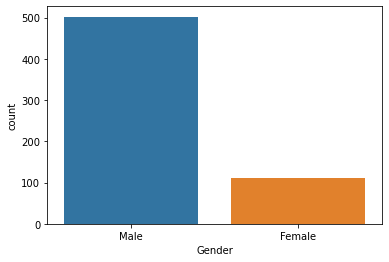

In [35]:
print("Number of people who have applied for a loan group by a gender :")
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data=df)

### here we can see there are 502 males and 112 females who have applied for loan

----------------------------------------------------------------------------------------------

Number of people who take a loan group by marital status :
Yes    401
No     213
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

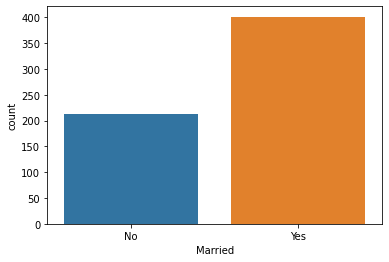

In [36]:
print("Number of people who take a loan group by marital status :")
print(df['Married'].value_counts())
sns.countplot(x='Married', data=df)


Number of people who take a loan group by dependents :
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

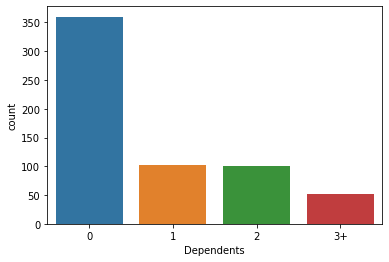

In [37]:
print("Number of people who take a loan group by dependents :")
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents', data=df)

Number of people who take a loan group by self employed :
No     532
Yes     82
Name: Self_Employed, dtype: int64


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

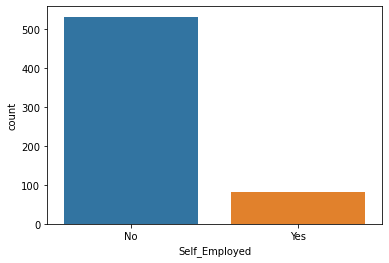

In [38]:
print("Number of people who take a loan group by self employed :")
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed', data=df)

Number of people who take a loan group by loan amount term :
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

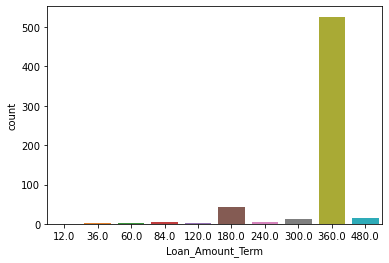

In [39]:
print("Number of people who take a loan group by loan amount term :")
print(df['Loan_Amount_Term'].value_counts())
sns.countplot(x='Loan_Amount_Term', data=df)

Number of people who take a loan group by credit history :
1.0    525
0.0     89
Name: Credit_History, dtype: int64


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

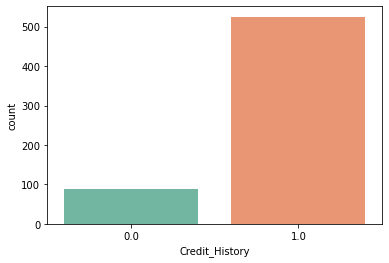

In [40]:
print("Number of people who take a loan group by credit history :")
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History', data=df, palette = 'Set2')

In [41]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

# now split the data into categorical and numerical

In [42]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [43]:
#split dataset car into 2 part
#first part hold all numeric type data
#second part hold all object type data
df_num=df.select_dtypes(['int64','float64'])
df_cat=df.select_dtypes(object)


In [44]:
df_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.412162,360.0,1.0
1,4583,1508.0,128.000000,360.0,1.0
2,3000,0.0,66.000000,360.0,1.0
3,2583,2358.0,120.000000,360.0,1.0
4,6000,0.0,141.000000,360.0,1.0


In [45]:
df_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [46]:
df_cat.dtypes



Gender           object
Married          object
Dependents       object
Education        object
Self_Employed    object
Property_Area    object
Loan_Status      object
dtype: object

In [47]:
df_num.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
dtype: object

### using label encoder to convert catogerical data into numerical

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
columns=df_cat.columns
columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [50]:
for col in columns:
    #create object of label encodr
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])
    

In [51]:
df_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1


### now concatenate both columns

In [52]:
loan=pd.concat([df_num,df_cat],axis=1)
loan.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,2,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,1,2,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,1,0,2,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,2,1


In [53]:
#checking duplicates
loan.duplicated().sum()

0

In [54]:
#select input and output
X=loan.drop('Loan_Status',axis=1)
Y=loan['Loan_Status']

In [55]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,2
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,1,2
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,1,0,2
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,2


In [56]:
Y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [57]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

### standardizing 

In [58]:
from sklearn.preprocessing import StandardScaler
#create object of Standard Scaler
ss=StandardScaler()
#Standardizing X_train and X_test

X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)


### creating a function

In [59]:
#create a function
def create_model(model): 
    model.fit(X_train,Y_train) #train the model
    Y_pred=model.predict(X_test) #test the model
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [60]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [61]:
#here data is imbalance 
#1 has more records than 0 
# 1 has 422 records 0 has 192 records
# that's why its affecting the accuracy 1 has the best accuracy of 98 but 0 has 41
# we have to use random over sampler to get balance data


### balancing data with random over sampler

In [62]:
#RandomOverSampler : inbuilt class : to increase means create duplicate 
#records of minority class which equal to majority class

#from imblearn.over_sampling import RandomOverSampler

In [63]:
# how many samples of  and 1 class in Y train
#Y_train.value_counts()

In [64]:
# apply random over sampler
#create object of random over sampler
#ros=RandomOverSampler(random_state=1)


In [65]:
#use inbuilt method fit_resampler()
#X_train_ros,Y_train_ros=ros.fit_resample(X_train,Y_train)

In [66]:
#check
#Y_train_ros.value_counts()

In [67]:
#apply randomoversampler ontesting data
#X_test_ros,Y_test_ros=ros.fit_resample(X_test,Y_test)

In [68]:
#check
#Y_test_ros.value_counts()

###  creating function of balance data

In [69]:
#create functiom
#def create_model(model):
    #model.fit(X_train_ros,Y_train_ros)#traim the model with 70%data
    #Y_pred=model.predict(X_test_ros)#test the model with 30%data
    #print(classification_report(Y_test_ros,Y_pred))#generate report
    #print(confusion_matrix(Y_test_ros,Y_pred))
    #return model


### perform with logistic regression

In [70]:
#modle perform with Logistic Regression
from sklearn.linear_model import LogisticRegression
#create the object of logistic regression
lr=LogisticRegression()


In [71]:
#call the functiom
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.89      0.41      0.56        61
           1       0.77      0.98      0.86       124

    accuracy                           0.79       185
   macro avg       0.83      0.69      0.71       185
weighted avg       0.81      0.79      0.76       185

[[ 25  36]
 [  3 121]]


### with decision tree

In [72]:
from sklearn.tree import DecisionTreeClassifier
#create the object of DecisionTreeClassifier class
dt=DecisionTreeClassifier()
#call the function

In [73]:
#call the function
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.56      0.56      0.56        61
           1       0.78      0.78      0.78       124

    accuracy                           0.71       185
   macro avg       0.67      0.67      0.67       185
weighted avg       0.71      0.71      0.71       185

[[34 27]
 [27 97]]


In [88]:
IG=dt.feature_importances_ #featuee importance inbuilt method of Decisiom Tre classfifer
IG

array([0.20831263, 0.15635164, 0.16640468, 0.04838531, 0.30720132,
       0.        , 0.01791865, 0.02655746, 0.01917893, 0.0146925 ,
       0.03499689])

In [90]:
X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married', 'Dependents',
       'Education', 'Self_Employed', 'Property_Area'],
      dtype='object')

In [91]:
#create dictionary
dict={'input':X.columns,'IG':IG}
df1=pd.DataFrame(dict)
df1

df1.sort_values('IG',ascending=False )#descending order according to iG

,input,IG
4,Credit_History,0.307201
0,ApplicantIncome,0.208313
2,LoanAmount,0.166405
1,CoapplicantIncome,0.156352
3,Loan_Amount_Term,0.048385
10,Property_Area,0.034997
7,Dependents,0.026557
8,Education,0.019179
6,Married,0.017919
9,Self_Employed,0.014692


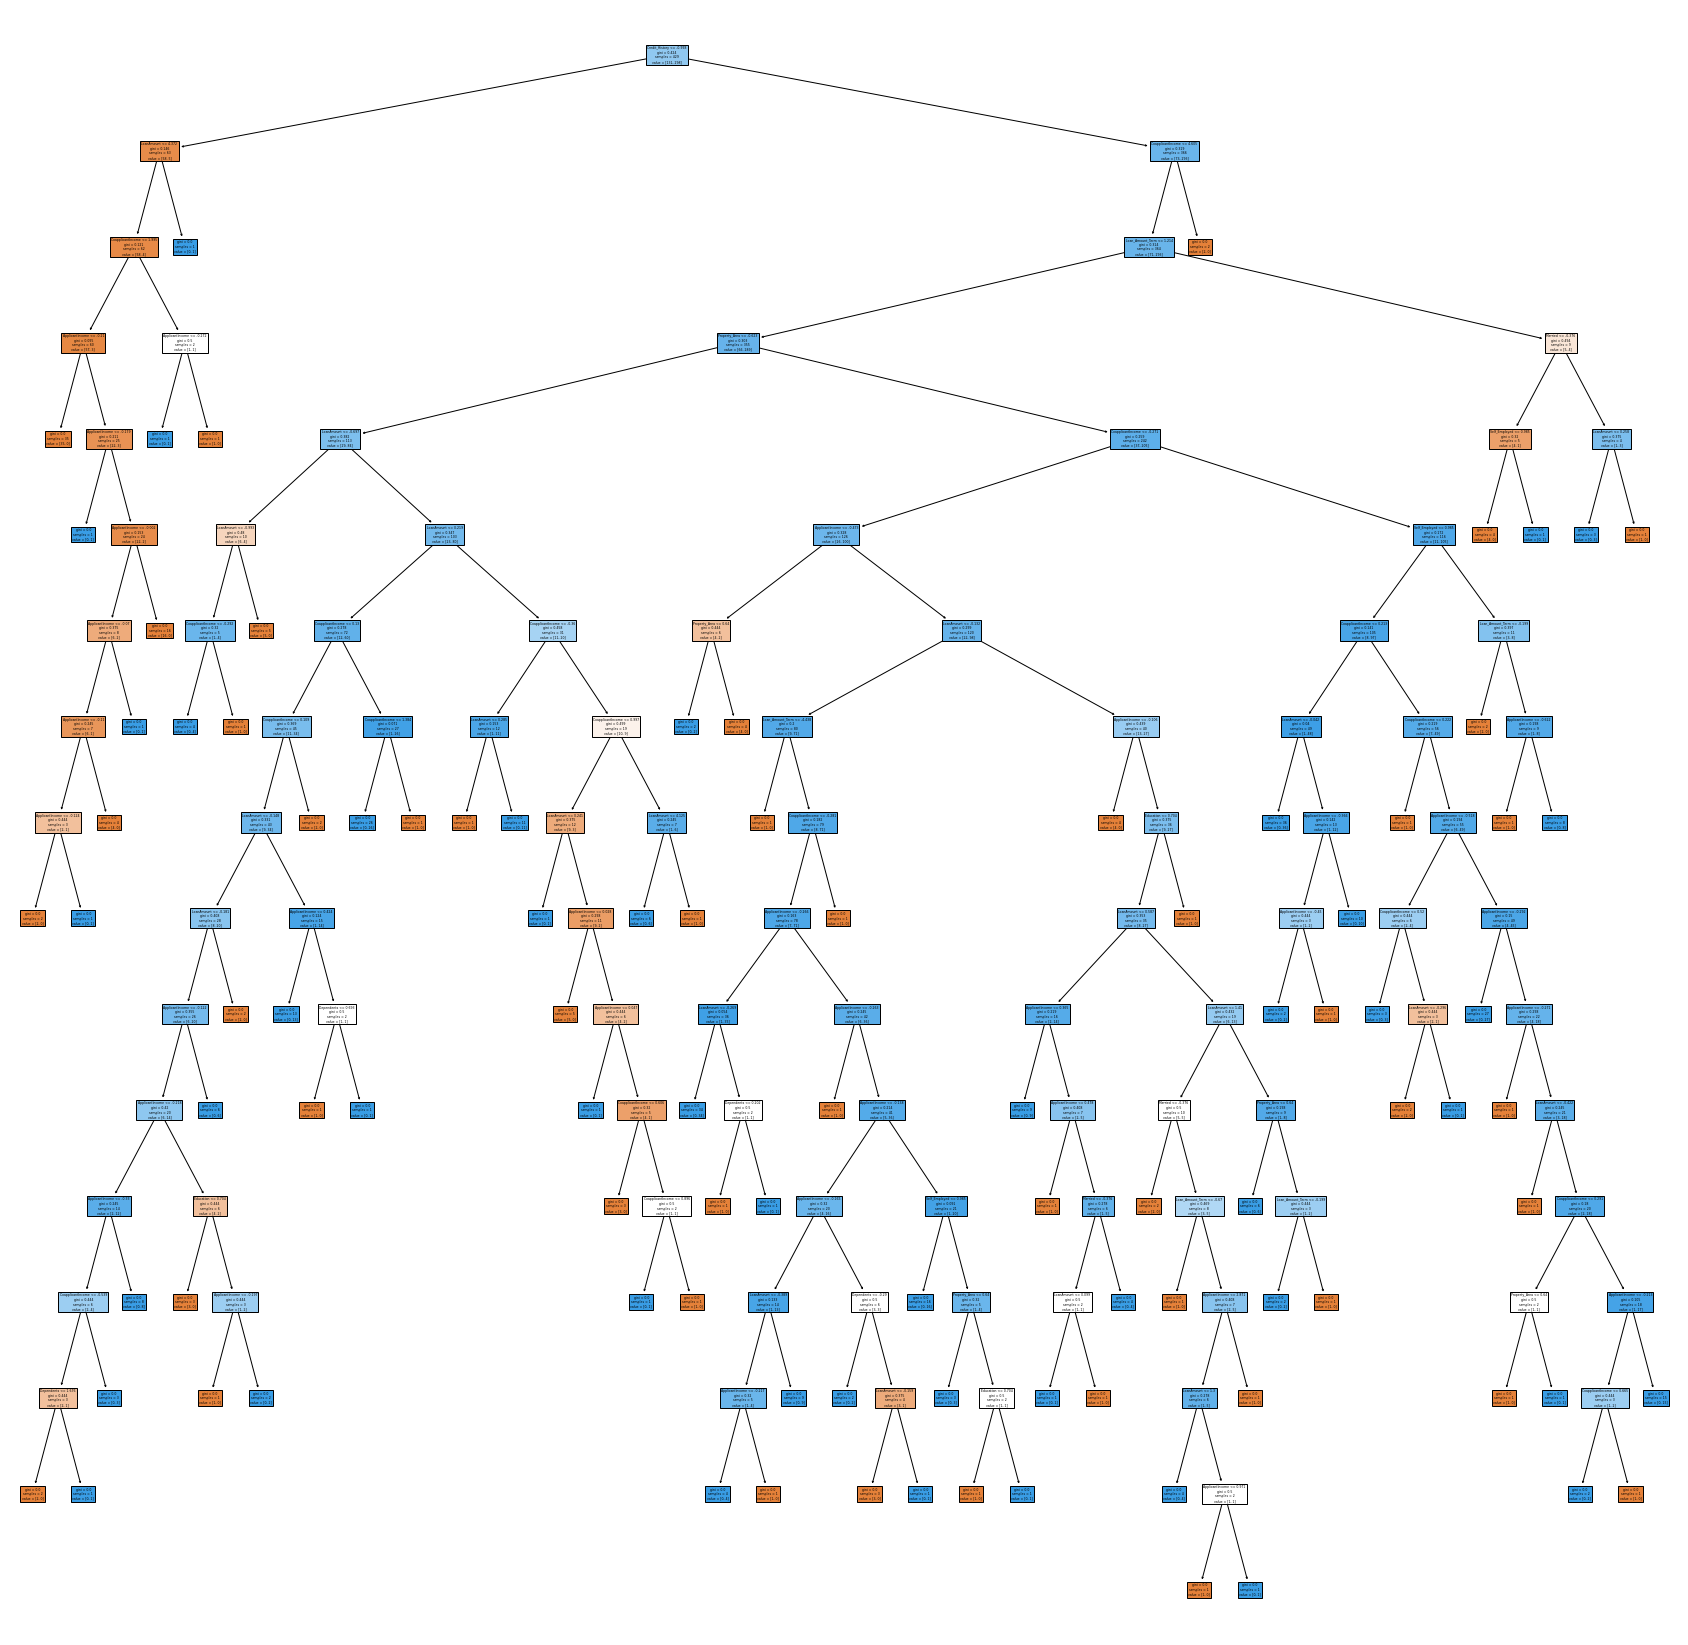

In [92]:
#create the tree 
from sklearn import tree
features=X.columns #input features
fig=plt.figure(figsize=(30,30))
_=tree.plot_tree(dt,feature_names=features,filled=True)

## decision Tree with pruning tehnique


In [75]:
#create objet of Decisiom TREE classifier class and passing the parameter
#maxdepth

dt1=DecisionTreeClassifier(random_state=1,max_depth=4)#by defalut gini
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.86      0.41      0.56        61
           1       0.77      0.97      0.86       124

    accuracy                           0.78       185
   macro avg       0.82      0.69      0.71       185
weighted avg       0.80      0.78      0.76       185

[[ 25  36]
 [  4 120]]


In [76]:
#create objet of Decisiom TREE classifier class and passing the parameter
#maxdepth

dt1=DecisionTreeClassifier(random_state=1,max_depth=4,criterion='entropy')
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.84      0.34      0.49        61
           1       0.75      0.97      0.85       124

    accuracy                           0.76       185
   macro avg       0.79      0.66      0.67       185
weighted avg       0.78      0.76      0.73       185

[[ 21  40]
 [  4 120]]


### 2nd pruning technique by gini index

In [77]:
#2nd purning technique : min_samples_leaf
#min_samples_leaf =45 or more means not less than=45
##create object of DecisionTreeClassifier class
#leaf node means no child

#for i in range(45,101,5):
    #print("min sample leaf: ",i)
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=65)
    #call function
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.67      1.00      0.80       124

    accuracy                           0.67       185
   macro avg       0.34      0.50      0.40       185
weighted avg       0.45      0.67      0.54       185

[[  0  61]
 [  0 124]]


### 2nd pruning technique by entropy

In [78]:
#for i in range(45,101,5):
    #print("min smaple : ",i)
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=65,criterion="entropy")#bydefault gini index
    #call function
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.67      1.00      0.80       124

    accuracy                           0.67       185
   macro avg       0.34      0.50      0.40       185
weighted avg       0.45      0.67      0.54       185

[[  0  61]
 [  0 124]]


# Ensembling technique

### random forest tree by gini

In [79]:
X.shape

(614, 11)

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
#create  object of Random forest Tree 
#for i in range(1,12):
rfc=RandomForestClassifier(n_estimators=41,max_features=4,random_state=1)
    #bydefault gini
    #call the function
    #print("NO of Dicision Tree : ",i)
rfc=create_model(rfc)
    #here n_estimators means take how many no. of decisiontree 
#max_features means take how many input

              precision    recall  f1-score   support

           0       0.78      0.46      0.58        61
           1       0.78      0.94      0.85       124

    accuracy                           0.78       185
   macro avg       0.78      0.70      0.71       185
weighted avg       0.78      0.78      0.76       185

[[ 28  33]
 [  8 116]]


### random forest tree by entropy

In [82]:
#with entropy
#Random Forest by entropy
#for i in range(1,12):
        #print("NO of Dicision Tree : ",i)


rfc=RandomForestClassifier(n_estimators=71,max_features=7,random_state=1,criterion="entropy")
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.78      0.48      0.59        61
           1       0.78      0.94      0.85       124

    accuracy                           0.78       185
   macro avg       0.78      0.71      0.72       185
weighted avg       0.78      0.78      0.77       185

[[ 29  32]
 [  8 116]]


# ADA boost

In [83]:
#Boosting technique it is also Ensembling technique
#ADA boost means Adopting Boosting

from sklearn.ensemble import AdaBoostClassifier

In [101]:
#create object of Ada boostClassifier class
#for i in range(1,12):
    #ada=AdaBoostClassifier(random_state=1,n_estimators=i)
   # ada=create_model(ada)#call the function
    #print("no of features : ",i)

In [85]:
ada=AdaBoostClassifier(random_state=1,n_estimators=4)
ada=create_model(ada)#call the function
#best decision stump


              precision    recall  f1-score   support

           0       0.89      0.39      0.55        61
           1       0.77      0.98      0.86       124

    accuracy                           0.78       185
   macro avg       0.83      0.68      0.70       185
weighted avg       0.81      0.78      0.76       185

[[ 24  37]
 [  3 121]]


### Gradient boost

In [86]:
#CALL GRADIENT BOOTCLASSIFIER
#call GradientBoostingClassifier class from following package
from sklearn.ensemble import GradientBoostingClassifier

In [100]:
#CREATE THE OBJECT OF GRADIENT BOOST CLASSIFIER
#for i in range(1,101):
gbc=GradientBoostingClassifier(random_state=1,n_estimators=2)
    #call the function
gbc=create_model(gbc)
#print("no of n_estimators or DC :",i)
#n_estimators can be <=100
#algo use decision treeclassiifer

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.67      1.00      0.80       124

    accuracy                           0.67       185
   macro avg       0.34      0.50      0.40       185
weighted avg       0.45      0.67      0.54       185

[[  0  61]
 [  0 124]]


# EXTREME GRADIENT BOOSTING

In [95]:
!pip install xgboost

     |████████████████████████████████| 1.7 MB 10.1 MB/s eta 0:00:01


In [96]:
from xgboost import XGBClassifier

In [99]:
#create obejct of class XGB classifier
#for i in range(1,101):
xgc=XGBClassifier(n_estimators=11,random_state=1,reg_alpha=1)
#automatic overfitiing : reg means regularisation and alpha or lambda:
#hyper parameter
#n_estimator<=100
    #call the function
xgc=create_model(xgc)
#print("no of estimator : ", i)

              precision    recall  f1-score   support

           0       0.81      0.41      0.54        61
           1       0.77      0.95      0.85       124

    accuracy                           0.77       185
   macro avg       0.79      0.68      0.70       185
weighted avg       0.78      0.77      0.75       185

[[ 25  36]
 [  6 118]]


# support vector

In [102]:
#Linear kernel function
#Call class
from sklearn.svm import LinearSVC
#LinearSVC means Linear Support Vector Classifier

In [103]:
#create object of LinearSVC Class
svc=LinearSVC(random_state=1)  #hard margin by default

In [104]:
#Call function
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.93      0.41      0.57        61
           1       0.77      0.98      0.87       124

    accuracy                           0.79       185
   macro avg       0.85      0.70      0.72       185
weighted avg       0.82      0.79      0.77       185

[[ 25  36]
 [  2 122]]


### with K-NN3

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
#create the object of Neighborsclassifier
#Create the object of KNeighborsClassifier  
knc= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) 
#p=2 means Euclidean distance means sqrt(x2-x1)*2+(y2-y1)*2
#n_neighbors means k means select minimum point (always odd)
#best value of k=5

In [107]:
knc=create_model(knc)

              precision    recall  f1-score   support

           0       0.79      0.43      0.55        61
           1       0.77      0.94      0.85       124

    accuracy                           0.77       185
   macro avg       0.78      0.68      0.70       185
weighted avg       0.78      0.77      0.75       185

[[ 26  35]
 [  7 117]]


### Naive bayes


In [108]:
from sklearn.naive_bayes import GaussianNB


In [109]:
#create thr functiom
gnb=GaussianNB()

In [110]:
#call the function
gnb=create_model(gnb)

              precision    recall  f1-score   support

           0       0.84      0.44      0.58        61
           1       0.78      0.96      0.86       124

    accuracy                           0.79       185
   macro avg       0.81      0.70      0.72       185
weighted avg       0.80      0.79      0.77       185

[[ 27  34]
 [  5 119]]


### conclusion

In [111]:
#we get best accuacy with logistic regression decision tree with both pruning techniques,random forest treee,
#ada boost XGboost naive bayes, knn, and svm
